In [32]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

Preprocessing

In [34]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
# checking missing values in the data
print(train_data.isnull().sum(),'\n')
print(test_data.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [ ]:
# filling missing values of categorical variables with mode and mean correspondingly
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(),inplace=True)
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0],inplace=True)

test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(),inplace=True)
test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0],inplace=True)

print(train_data.dtypes)
print(test_data.dtypes)

In [ ]:
# applying for loop to bring all the variables in range 0 to 1 in train

for i in train_data.columns[1:]:
    train_data[i] = (train_data[i] - train_data[i].min()) / (train_data[i].max() - train_data[i].min())
    
# applying for loop to bring all the variables in range 0 to 1 in train

for i in test_data.columns[1:]:
    test_data[i] = (test_data[i] - test_data[i].min()) / (test_data[i].max() - test_data[i].min())

In [ ]:
# saving the pre-processed data
train_data.to_csv('train_data_prediction.csv', index=False)
test_data.to_csv('test_data_prediction.csv', index=False)

Linear Regression - Training

In [3]:
train_data = pd.read_csv('train_data_prediction.csv')
test_data = pd.read_csv('test_data_prediction.csv')

In [4]:
train_data.isnull().sum()
train_data.dtypes

Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year    float64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
Item_Outlet_Sales            float64
dtype: object

In [5]:
test_data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [7]:
# storing all the independent variables as X
X = train_data.drop('Item_Outlet_Sales', axis=1)
# storing the dependent variable as y
y = train_data['Item_Outlet_Sales']
(X.shape), (y.shape)

((8523, 10), (8523,))

In [8]:

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.2)


In [9]:
# Import training libraries
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import InputLayer, Dense 

# defining input neurons
input_neurons = X_train.shape[1]
output_neurons = 1

# define hidden layers and neuron in each layer
neuron_hidden_layer_1 = 900
neuron_hidden_layer_2 = 500
neuron_hidden_layer_3 = 100
neuron_hidden_layer_4 = 50


In [10]:
# defining the architecture of the model
model = Sequential()
# model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, input_dim=input_neurons,activation='sigmoid'))
model.add(Dense(units=neuron_hidden_layer_2, activation='sigmoid'))
model.add(Dense(units=neuron_hidden_layer_3, activation='sigmoid'))
model.add(Dense(units=neuron_hidden_layer_4, activation='relu'))
model.add(Dense(units=output_neurons,activation='linear'))
model.compile(loss="mean_squared_error",optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 900)               9900      
_________________________________________________________________
dense_1 (Dense)              (None, 500)               450500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 515,601
Trainable params: 515,601
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200)

Epoch 1/200
214/214 [==============================] - 1s 5ms/step - loss: 0.0302 - accuracy: 1.4667e-04 - val_loss: 0.0181 - val_accuracy: 5.8651e-04
Epoch 2/200
214/214 [==============================] - 1s 5ms/step - loss: 0.0171 - accuracy: 1.4667e-04 - val_loss: 0.0165 - val_accuracy: 5.8651e-04
Epoch 3/200
214/214 [==============================] - 1s 5ms/step - loss: 0.0147 - accuracy: 1.4667e-04 - val_loss: 0.0344 - val_accuracy: 5.8651e-04
Epoch 4/200
214/214 [==============================] - 1s 5ms/step - loss: 0.0120 - accuracy: 1.4667e-04 - val_loss: 0.0101 - val_accuracy: 5.8651e-04
Epoch 5/200
214/214 [==============================] - 1s 5ms/step - loss: 0.0101 - accuracy: 1.4667e-04 - val_loss: 0.0134 - val_accuracy: 5.8651e-04
Epoch 6/200
214/214 [==============================] - 1s 5ms/step - loss: 0.0101 - accuracy: 1.4667e-04 - val_loss: 0.0124 - val_accuracy: 5.8651e-04
Epoch 7/200
214/214 [==============================] - 1s 5ms/step - loss: 0.0099 - accuracy: 

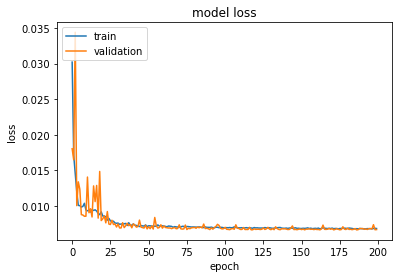

In [13]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [15]:
import sys
np.set_printoptions(threshold=sys.maxsize)

prediction = model.predict(X_train).astype(float)


Post Processing and testing

In [20]:
prediction.min()

0.012340130284428596

In [22]:
prediction.max()

0.46157604455947876

In [19]:
maxvalue = 13086.96
minvalue = 33.29
minmaxdifference = 13053.67

In [34]:
# reverse normalization
regression = []
for i in range(0,len(prediction)):   
    regression.append((prediction[i][0] * minmaxdifference) + minvalue)
   

<img src='https://drive.google.com/uc?id=1Z7wN2BE8CDSYIJly5l0K9uqYdj9WUo3f'>

In [17]:
sp = model.predict(test_data.astype(float))

In [20]:
# reverse normalization 
ss = []
for i in range(0,len(sp)):   
    ss.append((sp[i][0] * minmaxdifference) + minvalue)

In [30]:
ss = pd.DataFrame(ss)
ss.to_csv('predictions.csv',index=False,header=False)